<a href="https://colab.research.google.com/github/rahulsait/ExcelR-codes/blob/main/DECISION_TREE_C5_0_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Decision tree lib :

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split # to divide the test into train and test randomly
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
# Load the dataset :

iris = pd.read_csv("/content/iris.csv")

In [4]:
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [33]:
# let's remove the unnamed column :
iris = pd.read_csv("iris.csv", index_col = 0)

In [34]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [35]:
 # Quantifying the Y variable - "Species" using LabelEncoder() :

 label_encoder = preprocessing.LabelEncoder()
 iris["Class"] = label_encoder.fit_transform(iris["Species"])

In [36]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Class
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica,2
147,6.3,2.5,5.0,1.9,virginica,2
148,6.5,3.0,5.2,2.0,virginica,2
149,6.2,3.4,5.4,2.3,virginica,2


In [32]:
# Splitting X variables and Y variable :

x = iris.iloc[:,0:4]
y = iris["Class"]

In [37]:
x #(independent Var)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [38]:
y #(dependent Var)

1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Class, Length: 150, dtype: int64

In [39]:
# No. of classes :

iris["Class"].unique()

array([0, 1, 2])

In [40]:
# Count of each Class :

iris.Class.value_counts()

0    50
1    50
2    50
Name: Class, dtype: int64

In [41]:
colnames = list(iris.columns)
colnames

['Sepal.Length',
 'Sepal.Width',
 'Petal.Length',
 'Petal.Width',
 'Species',
 'Class']

In [42]:
# Splitting the data into training and testing dataset :

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

### **Building Decision Tree Classifier using Entropy Criteria :**

In [43]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3) # max_depth : restricting the levels to 3
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.375, 0.875, 'X[3] <= 0.8\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(0.125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

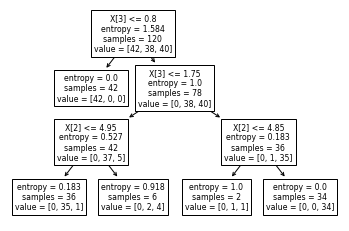

In [44]:
# Plot the Decision Tree :

tree.plot_tree(model)

[Text(0.375, 0.875, 'Petal width (cm) <= 0.8\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]\nclass = Setosa'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = Setosa'),
 Text(0.5, 0.625, 'Petal width (cm) <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]\nclass = Virginica'),
 Text(0.25, 0.375, 'Petal length (cm) <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]\nclass = Versicolor'),
 Text(0.125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]\nclass = Versicolor'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(0.75, 0.375, 'Petal length (cm) <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]\nclass = Virginica'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = Versicolor'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = Virginica')]

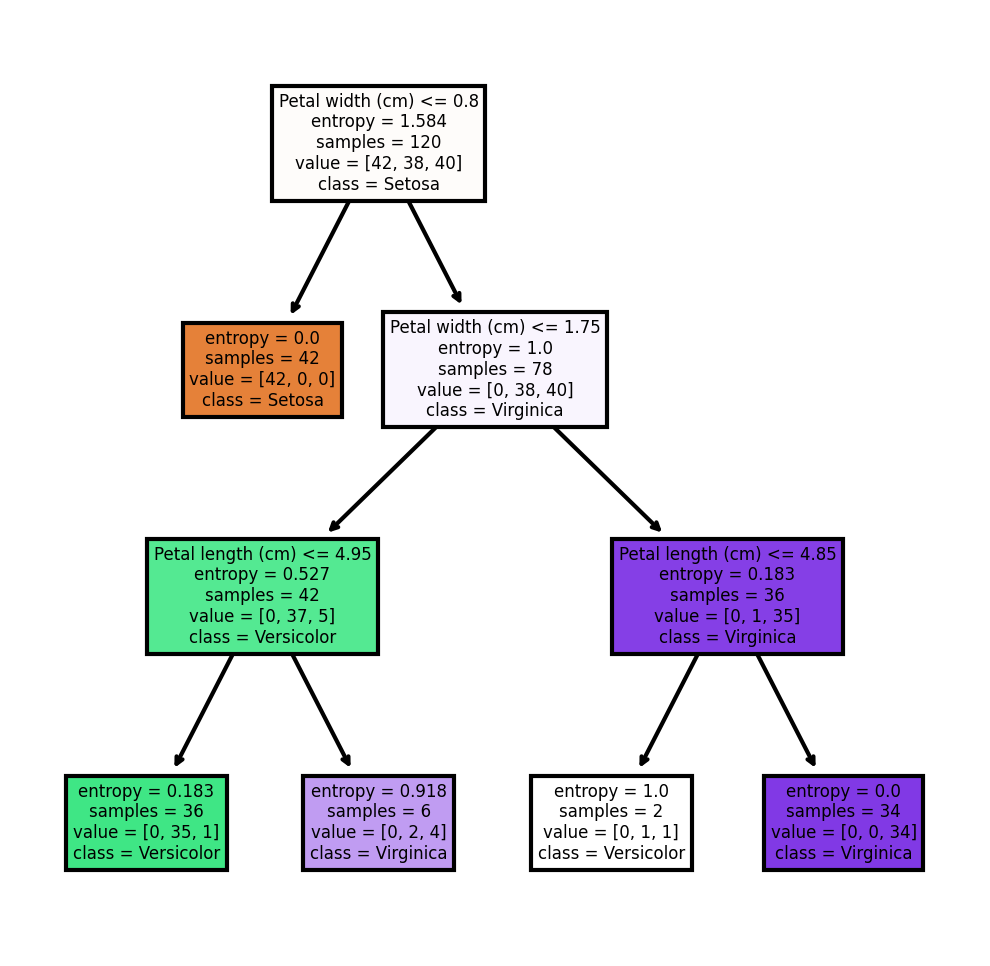

In [45]:
# Plotting using Seaborn :

fn = ["Sepal length (cm)", "Sepal width (cm)", "Petal length (cm)", "Petal width (cm)"]
cn = ["Setosa", "Versicolor", "Virginica"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True)

**Predicting on the test data :**

In [46]:
pred = model.predict(x_test)
pd.Series(pred).value_counts() # Count of each Class

1    13
2     9
0     8
dtype: int64

In [47]:
pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [49]:
# Create Confusion matrix :

pd.crosstab(y_test, pred)

col_0,0,1,2
Class,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [50]:
# Accuracy :

np.mean(pred == y_test)

0.9666666666666667

### **The Model is 96% accurate : Best fit**